# Comparison of RIC and RBDS marker set protocol

Reginaldo K Fukuchi, Jan 2023, reginaldo.fukuchi@ufabc.edu.br

This NB compares the marker set protocols employed by the Running Injury Clinic (during my PhD work) and the RBDS study.

In [1]:
# Prepare environment
import os
import scipy.io as spio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Import data
pathname = r'../data'

## Choose RIC or RBDS data set

In [3]:
db_name = 'RIC'

In [4]:
if db_name=='RIC':
    fname_out_S = os.path.join(pathname, 'RIC_static.csv')
    fname_out_R = os.path.join(pathname, 'RIC_run.csv')
else:
    fname_out_S = os.path.join(pathname, 'RBDS_static.csv')
    fname_out_R = os.path.join(pathname, 'RBDS_run.csv')
    
print('Static trial filename: ' + fname_out_S)
print('Running trial filename: ' + fname_out_R)

Static trial filename: ../data\RIC_static.csv
Running trial filename: ../data\RIC_run.csv


In [5]:
df_s = pd.read_csv(fname_out_S, delimiter=',', index_col='Time')

In [6]:
df_s.head()

,RIC_X,RIC_Y,RIC_Z,LIC_X,LIC_Y,LIC_Z,RASI_X,RASI_Y,RASI_Z,LASI_X,...,LELB_Z,LW_X,LW_Y,LW_Z,RBAK_X,RBAK_Y,RBAK_Z,RARM_X,RARM_Y,RARM_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,24.144964,1186.501953,690.302979,45.394676,1193.250000,358.820160,-58.366940,1110.803223,651.372681,-48.910542,...,136.046143,-217.815277,1287.846191,145.004547,161.044846,1530.513916,651.696716,37.805531,1399.390259,813.931702
0.005025,24.149342,1186.498047,690.303223,45.349300,1193.242920,358.869385,-58.410744,1110.811401,651.432922,-48.848274,...,136.032959,-217.842819,1287.799316,144.968643,160.978165,1530.546875,651.692810,37.799965,1399.384399,813.946045
0.010050,24.149654,1186.497803,690.303345,45.391197,1193.255859,358.778748,-58.387333,1110.797974,651.415833,-48.830948,...,135.974808,-217.844437,1287.835938,144.960144,161.020508,1530.567261,651.693420,37.797764,1399.387817,813.948242
0.015075,24.186714,1186.468872,690.373108,45.360054,1193.252319,358.839172,-58.374546,1110.795410,651.402527,-48.841980,...,136.006287,-217.888351,1287.867554,145.000275,160.980759,1530.528564,651.744080,37.733063,1399.360474,813.914124
0.020101,24.152397,1186.469849,690.344238,45.320061,1193.218262,358.845856,-58.393387,1110.808594,651.387634,-48.893497,...,136.023819,-217.894638,1287.856079,144.964432,160.956314,1530.513306,651.748840,37.732792,1399.419189,813.904419


### Calculate hip joint center
* https://c-motion.com/v3dwiki/index.php?title=Coda_Pelvis
* RHJC=(-0.19*ASIS_Distance,-0.3*ASIS_Distance,0.36*ASIS_Distance)

In [7]:
RASI = df_s[['RASI_X','RASI_Y','RASI_Z']].values.mean(axis=0)
LASI = df_s[['LASI_X','LASI_Y','LASI_Z']].values.mean(axis=0)
ASIS_distance_S = np.linalg.norm(RASI-LASI)
rhjc_S = np.array([RASI[0]-0.19*ASIS_distance_S, RASI[1]-0.3*ASIS_distance_S, 
                   RASI[2]-0.36*ASIS_distance_S])

In [8]:
# Shank reference system
rkjc_S = (df_s[['RKNL_X','RKNL_Y','RKNL_Z']].values.mean(axis=0)+
        df_s[['RKNM_X','RKNM_Y','RKNM_Z']].values.mean(axis=0))/2
rajc_S = (df_s[['RMAL_X','RMAL_Y','RMAL_Z']].values.mean(axis=0)+
        df_s[['RMAM_X','RMAM_Y','RMAM_Z']].values.mean(axis=0))/2

v2 = rkjc_S - rajc_S
v1 = np.cross(v2, df_s[['RMAL_X','RMAL_Y','RMAL_Z']].values.mean(axis=0) - rajc_S)
v3 = np.cross(v1, v2)

print('Versors of the shank:')
v1 = v1/np.linalg.norm(v1)
print('v1 =', v1)
v2 = v2/np.linalg.norm(v2)
print('v2 =', v2)
v3 = v3/np.linalg.norm(v3)
print('v3 =', v3)

bs = np.array([v1, v2, v3])

Versors of the shank:
v1 = [ 0.9653534   0.15921512 -0.20674467]
v2 = [-0.17902132  0.98052166 -0.08079998]
v3 = [0.18985305 0.11501224 0.97505282]


In [9]:
# Thigh reference system
v2t = rhjc_S-rkjc_S
v1t = np.cross(v2t,df_s[['RKNL_X','RKNL_Y','RKNL_Z']].values.mean(axis=0)-rkjc_S)
v3t = np.cross(v2t,v1t)

print('Versors of the thigh:')
v1t = v1t/np.linalg.norm(v1t)
print('v1t =', v1t)
v2t = v2t/np.linalg.norm(v2t)
print('v2t =', v2t)
v3t = v3t/np.linalg.norm(v3t)
print('v3t =', v3t)

bt = np.array([v1t,v2t,v3t])

Versors of the thigh:
v1t = [ 0.98221147  0.18252594 -0.04410104]
v2t = [-0.18743334  0.96721149 -0.17137878]
v3t = [-0.01137396 -0.17659621 -0.98421766]


## Calculate knee joint angle according to Grood & Suntay (1983)

In [10]:
def kneeang(proxrf, distalrf):
    """
    Calculate 3D knee joint angle in degrees
    """
    angk = np.empty(shape=(3,))
    proxrf = bt
    distalrf = bs
    yk = bs[1,:];
    zk = bt[2,:];
    fk = np.cross(yk,zk); #floating axis
    fk = fk/np.linalg.norm(fk)
    bk =np.array([fk, yk, zk]);
    zs_t = bs[2,:];
    
    # knee angle
    angk[0] = -(np.pi/2 - np.arccos(np.sum(bt[1]*fk)))*180/np.pi # Flexion/Extension
    angk[1] = (-np.pi/2 - np.arccos(np.sum(yk*bt[2])))*180/np.pi + 180 #Abduction/aduction
    angk[2] = (np.pi/2 - np.arccos(np.sum(zs_t*fk)))*180/np.pi #Internal/external rotation
    
    return angk

# Running data

In [11]:
df_r = pd.read_csv(fname_out_R, delimiter=',', index_col='Time')

In [12]:
df_r.head()

,LA_X,LA_Y,LA_Z,LELB_X,LELB_Y,LELB_Z,LHED_X,LHED_Y,LHED_Z,LHEL_X,...,RTTM_Z,RW_X,RW_Y,RW_Z,T2_X,T2_Y,T2_Z,VSAC_X,VSAC_Y,VSAC_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,-398.161560,1531.059204,163.965179,-203.915451,1255.390747,105.111954,-89.617287,253.640991,274.866730,-116.352310,...,439.844635,-659.593994,1325.481079,661.731567,-367.014679,1558.014160,361.150757,-258.306030,1079.420532,338.403290
0.005000,-396.975830,1534.028687,163.801010,-200.577881,1260.241455,105.875885,-102.633423,242.068863,275.785309,-130.274963,...,440.186005,-662.034546,1331.052979,656.429932,-366.713928,1560.372437,360.832336,-258.543060,1082.309814,339.075439
0.010001,-395.712799,1536.789673,163.780914,-197.440231,1265.020386,106.376434,-116.600204,230.331619,276.880188,-144.524170,...,440.613007,-663.557129,1336.546631,651.440247,-366.440308,1563.209229,360.537842,-259.075287,1085.162231,339.930023
0.015001,-394.591675,1539.397583,163.918015,-194.575974,1269.799194,106.865036,-131.050339,218.574860,278.511292,-158.984375,...,441.177704,-665.156128,1341.768799,646.443970,-366.489624,1566.391479,360.356140,-259.805908,1088.077271,340.657166
0.020002,-393.804871,1542.444580,163.567169,-191.887970,1274.587402,107.420563,-146.435577,206.578934,280.512207,-174.112625,...,441.429291,-666.898132,1346.794067,640.757080,-366.825043,1569.148193,360.080872,-260.589386,1091.033081,341.319092


## Gait events (TD and TO)
These gait events were detected in another NB (RIC_RBDS_gait_events_detection.ipynb) using the method of Zeni.

In [13]:
if db_name=='RIC':
    iTD = np.array([  100,   236,   375,   515,   654,   791,   930,  1068,  1205,
        1342,  1481,  1618,  1757,  1896,  2038,  2175,  2311,  2447,
        2583,  2718,  2856,  2990,  3126,  3264,  3399,  3539,  3677,
        3814,  3951,  4092,  4231,  4369,  4506,  4645,  4783,  4924,
        5063,  5202,  5340,  5478,  5615,  5751,  5888,  6027,  6164,
        6302,  6438,  6577,  6713,  6849,  6989,  7126,  7262,  7402,
        7539,  7675,  7811,  7949,  8087,  8223,  8361,  8495,  8634,
        8772,  8913,  9049,  9184,  9322,  9458,  9594,  9730,  9867,
       10003, 10138, 10274, 10412, 10548, 10686, 10821, 10956, 11097,
       11233, 11369, 11506, 11643, 11783, 11919, 11990],
      dtype=np.int64)
    iTO = np.array([   37,   172,   313,   453,   591,   729,   866,  1005,  1141,
        1279,  1420,  1555,  1694,  1835,  1973,  2113,  2249,  2387,
        2522,  2655,  2792,  2927,  3065,  3202,  3339,  3474,  3613,
        3750,  3889,  4028,  4167,  4306,  4445,  4582,  4722,  4862,
        5000,  5139,  5276,  5414,  5552,  5691,  5826,  5964,  6102,
        6240,  6375,  6514,  6650,  6786,  6925,  7064,  7202,  7339,
        7477,  7613,  7750,  7888,  8025,  8162,  8296,  8435,  8571,
        8710,  8851,  8990,  9123,  9260,  9397,  9532,  9668,  9805,
        9942, 10076, 10213, 10350, 10486, 10626, 10758, 10895, 11034,
       11168, 11307, 11443, 11579, 11717, 11857, 11993], dtype=np.int64)
else:
    iTD = np.array([  37,  143,  248,  352,  456,  559,  666,  772,  876,  982, 1089,
           1193, 1298, 1399, 1504, 1610, 1717, 1821, 1930, 2033, 2139, 2245,
           2351, 2456, 2563, 2668, 2775, 2877, 2985, 3088, 3195, 3298, 3404,
           3506, 3612, 3716, 3824, 3929, 4033, 4140, 4246, 4348, 4456],
          dtype=np.int64)
    iTO = np.array([  85,  192,  298,  402,  507,  610,  717,  819,  900, 1032, 1135,
           1241, 1346, 1449, 1556, 1659, 1766, 1871, 1978, 2081, 2187, 2293,
           2399, 2505, 2611, 2717, 2823, 2927, 3032, 3139, 3242, 3345, 3453,
           3558, 3661, 3767, 3872, 3977, 4057, 4189, 4293, 4397], dtype=np.int64)

## Reconstruct anatomical markers using SVD algorithm

In [14]:
import sys
sys.path.insert(1, r'./../functions')
from svdt import svdt

### The RIC marker protocol does not have RASI and LASI markers in the running trials, so we have to create virtual ones

In [15]:
if db_name=='RIC':
    # Pelvic segment
    Ap = df_s[['RPSI_X','RPSI_Y','RPSI_Z','LPSI_X','LPSI_Y','LPSI_Z',
               'VSAC_X','VSAC_Y','VSAC_Z']].values.mean(axis=0)
    Bp = df_r[['RPSI_X','RPSI_Y','RPSI_Z','LPSI_X','LPSI_Y','LPSI_Z',
               'VSAC_X','VSAC_Y','VSAC_Z']].values
    
    # Reconstructed markers based on technical clusters
    Rp, Lp, RMSEp = svdt(Ap, Bp)    
    RASIs = df_s[['RASI_X','RASI_Y','RASI_Z']].values.mean(axis=0)
    LASIs = df_s[['LASI_X','LASI_Y','LASI_Z']].values.mean(axis=0)
    RASIr = np.dot(Rp,RASIs)  + Lp
    LASIr = np.dot(Rp,LASIs)  + Lp
else:
    RASIr = df_r[['RASI_X','RASI_Y','RASI_Z']].values
    LASIr = df_r[['LASI_X','LASI_Y','LASI_Z']].values

In [16]:
# Thigh segment
At = df_s[['RTTL_X','RTTL_Y','RTTL_Z','RTTM_X','RTTM_Y','RTTM_Z',
             'RTBL_X','RTBL_Y','RTBL_Z','RTBM_X','RTBM_Y','RTBM_Z']].values.mean(axis=0)
Bt = df_r[['RTTL_X','RTTL_Y','RTTL_Z','RTTM_X','RTTM_Y','RTTM_Z',
             'RTBL_X','RTBL_Y','RTBL_Z','RTBM_X','RTBM_Y','RTBM_Z']].values
Rt, Lt, RMSEt = svdt(At, Bt)

In [17]:
# Shank segment
As = df_s[['RSTL_X','RSTL_Y','RSTL_Z','RSTM_X','RSTM_Y','RSTM_Z',
             'RSBL_X','RSBL_Y','RSBL_Z','RSBM_X','RSBM_Y','RSBM_Z']].values.mean(axis=0)
Bs = df_r[['RSTL_X','RSTL_Y','RSTL_Z','RSTM_X','RSTM_Y','RSTM_Z',
             'RSBL_X','RSBL_Y','RSBL_Z','RSBM_X','RSBM_Y','RSBM_Z']].values
Rs, Ls, RMSEs = svdt(As, Bs)

In [18]:
# knee markers
RKNLs = df_s[['RKNL_X','RKNL_Y','RKNL_Z']].values.mean(axis=0)
RKNMs = df_s[['RKNM_X','RKNM_Y','RKNM_Z']].values.mean(axis=0)
RKNLr = np.empty(shape=(Rt.shape[0],3))
RKNMr = np.empty(shape=(Rt.shape[0],3))
# ankle markers
RMALs = df_s[['RMAL_X','RMAL_Y','RMAL_Z']].values.mean(axis=0)
RMAMs = df_s[['RMAM_X','RMAM_Y','RMAM_Z']].values.mean(axis=0)
RMALr = np.empty(shape=(Rs.shape[0],3))
RMAMr = np.empty(shape=(Rs.shape[0],3))
# Reconstructed markers based on technical clusters
RKNLr = np.dot(Rt,RKNLs)  + Lt
RKNMr = np.dot(Rt,RKNMs)  + Lt
RMALr = np.dot(Rs,RMALs)  + Ls
RMAMr = np.dot(Rs,RMAMs)  + Ls

### Hip, knee and ankle joint centres

In [19]:
ASIS_distanceR = np.linalg.norm(RASIr-LASIr, axis=1)
rhjc_R = np.array([RASIr[:,0]-0.19*ASIS_distanceR, RASIr[:,1]-0.3*ASIS_distanceR, RASIr[:,2]-0.36*ASIS_distanceR]).T

In [20]:
rkjc_R = (RKNLr+RKNMr)/2
rajc_R = (RMALr+RMAMr)/2

In [21]:
def thighCS(rhjc_R, rkjc_R, RKNLr):
    # Thigh reference system
    v2t = rhjc_R-rkjc_R
    v1t = np.cross(v2t,RKNLr-rkjc_R)
    v3t = np.cross(v1t,v2t)

    v1t = v1t/np.linalg.norm(v1t)
    v2t = v2t/np.linalg.norm(v2t)
    v3t = v3t/np.linalg.norm(v3t)

    bt = np.array([v1t,v2t,v3t])
    
    return bt

In [22]:
def shankCS(rkjc_R, rajc_R, RMALr):
    # Shank reference system
    v2s = rkjc_R-rajc_R
    v1s = np.cross(v2s,RMALr-rajc_R)
    v3s = np.cross(v1s,v2s)

    v1s = v1s/np.linalg.norm(v1s)
    v2s = v2s/np.linalg.norm(v2s)
    v3s = v3s/np.linalg.norm(v3s)

    bs = np.array([v1s,v2s,v3s])
    
    return bs

### Knee angle during running

In [23]:
angk_r = np.empty(shape=(rkjc_R.shape[0],3))
for i in range(rkjc_R.shape[0]):
    bt = thighCS(rhjc_R[i,:],rkjc_R[i,:],RKNLr[i,:])
    bs = shankCS(rkjc_R[i,:],rajc_R[i,:],RMALr[i,:])
    # Knee angle
    angk_r[i,:] = kneeang(bt, bs)

In [ ]:
time = df_r.index.values

<IPython.core.display.Javascript object>


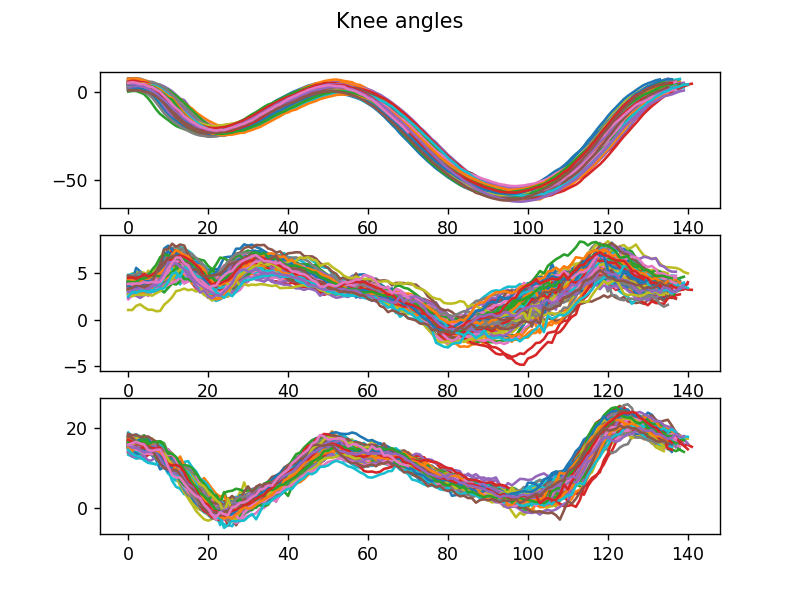

In [24]:
fig, axs = plt.subplots(3,1)
fig.suptitle('Knee angles')
for i in range(iTD.shape[0]-1):
    axs[0].plot(angk_r[iTD[i]:iTD[i+1],0])
    axs[1].plot(angk_r[iTD[i]:iTD[i+1],1])
    axs[2].plot(angk_r[iTD[i]:iTD[i+1],2])
plt.show()

# CONTINUAR
## REPETIR COM OS DADOS DA RIC
## VAI PRECISAR CRIAR MARCAS VIRTUAIS RASI E LASI pois usam cluster na pelve

In [ ]:
# Save df with new labels
df_s_RBDS.to_csv(os.path.join(pathname, 'RBDS_static_2.csv'))